In [1]:
import re
import numpy as np

def remove_docstrings(code):
    # 使用正则表达式匹配被 """ 包括的部分，并替换为空字符串
    cleaned_code = re.sub(r'""".*?"""', '', code, flags=re.DOTALL)
    cleaned_code = re.sub(r"'''.*?'''", '', cleaned_code, flags=re.DOTALL)
    return cleaned_code

def cosine_similarity_matrix(nl_features, code_features):
    # 计算每个特征向量的范数
    nl_norms = np.linalg.norm(nl_features, axis=1, keepdims=True)
    code_norms = np.linalg.norm(code_features, axis=1, keepdims=True)
    
    # 计算点积
    dot_product = np.dot(nl_features, code_features.T)
    
    # 计算余弦相似度矩阵
    cosine_similarity = dot_product / (nl_norms * code_norms.T)
    
    return cosine_similarity

In [2]:
def remove_padding_intervals(tokenized_id_data):
    """
    移除 tokenized_id_data 中所有 `[0,0]` 区间（除非它是开头的第一个区间）。

    Args:
    - tokenized_id_data (list of lists): 包含区间的列表，每个区间是一个长度为 2 的列表。

    Returns:
    - filtered_data (list of lists): 移除 `[0,0]` 填充数据后的区间列表。
    """
    if isinstance(tokenized_id_data, np.ndarray):
        tokenized_id_data = tokenized_id_data.tolist()  # 将 NumPy 数组转换为列表
    # 处理的结果列表
    filtered_data = []

    # 保留开头的 `[0,0]` 区间（如果存在）
    if tokenized_id_data and tokenized_id_data[0] == [0,0]:
        filtered_data.append([0,0])
        start_index = 1  # 从第二个元素开始检查
    else:
        start_index = 0

    # 处理剩余的区间
    for interval in tokenized_id_data[start_index:]:
        if interval != [0,0]:  # 仅添加非 `[0,0]` 区间
            filtered_data.append(interval)

    return filtered_data

In [3]:
import json
def load_loss_data(filepath):
    with open(filepath, 'r') as file:
        data = json.load(file)
    return np.array(data)

In [4]:
with open("/home/yiming/cophi/projects/fork/CodeBERT/GraphCodeBERT/codesearch/dataset/python/train.jsonl", "r") as f:
    train_dataset = [json.loads(line) for line in f.readlines()]


In [465]:
from sklearn.metrics.pairwise import cosine_similarity
code_cls_tokens_path = '/home/yiming/cophi/training_dynamic/features/aa_possim/train_code_cls_token_aa.npy'
nl_cls_tokens_path = '/home/yiming/cophi/training_dynamic/features/aa_possim/train_nl_cls_token_aa.npy'

nl_cls_tokens = np.load(nl_cls_tokens_path)
code_cls_tokens = np.load(code_cls_tokens_path)

similarities = cosine_similarity(nl_cls_tokens, code_cls_tokens)

# 为每个comment找到最相似的code，并进行排序
most_similar_code_indices = np.argsort(-similarities, axis=1)  # 降序排序


In [6]:
retri_code_cls_tokens_path = '/home/yiming/cophi/training_dynamic/features/retri/train_code_cls_token_retri.npy'
retri_nl_cls_tokens_path = '/home/yiming/cophi/training_dynamic/features/retri/train_nl_cls_token_retri.npy'

retri_nl_cls_tokens = np.load(retri_nl_cls_tokens_path)
retri_code_cls_tokens = np.load(retri_code_cls_tokens_path)

retri_similarities = cosine_similarity(retri_nl_cls_tokens, retri_code_cls_tokens)

# 为每个comment找到最相似的code，并进行排序
retri_most_similar_code_indices = np.argsort(-retri_similarities, axis=1)  # 降序排序

In [7]:
# 假设 most_similar_code_indices 的形状为 (320, n)
retri_num_rows = retri_most_similar_code_indices.shape[0]

retri_ranks=[]

# 遍历每一行，检查前十个值是否包含当前的行索引
for row_idx in range(retri_num_rows):
    rank = 0
    top_10_indices = retri_most_similar_code_indices[row_idx, :100]  # 获取前十个值
    matched = False

    # 遍历前十个索引，检查是否有相同的 URL
    for idx in top_10_indices:
        rank+=1
        if idx == row_idx:
            matched = True
            break

    # 输出是否匹配
    if matched:
        retri_ranks.append(1/rank)
        print(f"行 {row_idx} 的前十个最相似代码中包含相同的 URL，排名为 {rank}。")
    else:
        retri_ranks.append(0)

行 0 的前十个最相似代码中包含相同的 URL，排名为 22。
行 1 的前十个最相似代码中包含相同的 URL，排名为 5。
行 2 的前十个最相似代码中包含相同的 URL，排名为 1。
行 3 的前十个最相似代码中包含相同的 URL，排名为 3。
行 4 的前十个最相似代码中包含相同的 URL，排名为 1。
行 5 的前十个最相似代码中包含相同的 URL，排名为 1。
行 6 的前十个最相似代码中包含相同的 URL，排名为 1。
行 7 的前十个最相似代码中包含相同的 URL，排名为 1。
行 8 的前十个最相似代码中包含相同的 URL，排名为 1。
行 9 的前十个最相似代码中包含相同的 URL，排名为 1。
行 10 的前十个最相似代码中包含相同的 URL，排名为 1。
行 11 的前十个最相似代码中包含相同的 URL，排名为 1。
行 12 的前十个最相似代码中包含相同的 URL，排名为 1。
行 13 的前十个最相似代码中包含相同的 URL，排名为 1。
行 14 的前十个最相似代码中包含相同的 URL，排名为 1。
行 15 的前十个最相似代码中包含相同的 URL，排名为 1。
行 16 的前十个最相似代码中包含相同的 URL，排名为 6。
行 17 的前十个最相似代码中包含相同的 URL，排名为 1。
行 18 的前十个最相似代码中包含相同的 URL，排名为 1。
行 19 的前十个最相似代码中包含相同的 URL，排名为 1。
行 20 的前十个最相似代码中包含相同的 URL，排名为 8。
行 21 的前十个最相似代码中包含相同的 URL，排名为 1。
行 22 的前十个最相似代码中包含相同的 URL，排名为 1。
行 23 的前十个最相似代码中包含相同的 URL，排名为 17。
行 24 的前十个最相似代码中包含相同的 URL，排名为 1。
行 25 的前十个最相似代码中包含相同的 URL，排名为 1。
行 26 的前十个最相似代码中包含相同的 URL，排名为 1。
行 27 的前十个最相似代码中包含相同的 URL，排名为 4。
行 28 的前十个最相似代码中包含相同的 URL，排名为 2。
行 29 的前十个最相似代码中包含相同的 URL，排名为 1。
行 30 的前十个最相似代码中包含相同的 URL，排名为 1。
行 31 的前十个最相似代码中包

In [8]:
# 假设 most_similar_code_indices 的形状为 (320, n)
num_rows = most_similar_code_indices.shape[0]

ranks=[]

# 遍历每一行，检查前十个值是否包含当前的行索引
for row_idx in range(num_rows):
    rank = 0
    top_10_indices = most_similar_code_indices[row_idx, :100]  # 获取前十个值
    matched = False

    # 遍历前十个索引，检查是否有相同的 URL
    for idx in top_10_indices:
        rank+=1
        if idx == row_idx:
            matched = True
            break

    # 输出是否匹配
    if matched:
        ranks.append(1/rank)
        print(f"行 {row_idx} 的前十个最相似代码中包含相同的 URL，排名为 {rank}。")
    else:
        ranks.append(0)


行 1 的前十个最相似代码中包含相同的 URL，排名为 4。
行 2 的前十个最相似代码中包含相同的 URL，排名为 1。
行 3 的前十个最相似代码中包含相同的 URL，排名为 1。
行 4 的前十个最相似代码中包含相同的 URL，排名为 1。
行 5 的前十个最相似代码中包含相同的 URL，排名为 1。
行 6 的前十个最相似代码中包含相同的 URL，排名为 1。
行 7 的前十个最相似代码中包含相同的 URL，排名为 1。
行 8 的前十个最相似代码中包含相同的 URL，排名为 1。
行 9 的前十个最相似代码中包含相同的 URL，排名为 1。
行 10 的前十个最相似代码中包含相同的 URL，排名为 1。
行 11 的前十个最相似代码中包含相同的 URL，排名为 1。
行 12 的前十个最相似代码中包含相同的 URL，排名为 3。
行 13 的前十个最相似代码中包含相同的 URL，排名为 1。
行 14 的前十个最相似代码中包含相同的 URL，排名为 1。
行 15 的前十个最相似代码中包含相同的 URL，排名为 1。
行 16 的前十个最相似代码中包含相同的 URL，排名为 14。
行 17 的前十个最相似代码中包含相同的 URL，排名为 1。
行 18 的前十个最相似代码中包含相同的 URL，排名为 1。
行 19 的前十个最相似代码中包含相同的 URL，排名为 1。
行 20 的前十个最相似代码中包含相同的 URL，排名为 12。
行 21 的前十个最相似代码中包含相同的 URL，排名为 1。
行 22 的前十个最相似代码中包含相同的 URL，排名为 5。
行 23 的前十个最相似代码中包含相同的 URL，排名为 30。
行 24 的前十个最相似代码中包含相同的 URL，排名为 1。
行 25 的前十个最相似代码中包含相同的 URL，排名为 1。
行 26 的前十个最相似代码中包含相同的 URL，排名为 1。
行 27 的前十个最相似代码中包含相同的 URL，排名为 5。
行 28 的前十个最相似代码中包含相同的 URL，排名为 2。
行 29 的前十个最相似代码中包含相同的 URL，排名为 1。
行 30 的前十个最相似代码中包含相同的 URL，排名为 1。
行 31 的前十个最相似代码中包含相同的 URL，排名为 1。
行 32 的前十个最相似代码

In [9]:
np.mean(ranks)

0.7799787165411171

In [10]:
np.mean(retri_ranks)

0.7886067221860981

In [11]:
retri_ranks[6470], ranks[6470]

(0.03225806451612903, 0.5)

In [12]:
import json
input_path = "/home/yiming/cophi/projects/fork/CodeBERT/GraphCodeBERT/codesearch/sorted_label_human_auto.jsonl"
idx_list = []
match_list = []

with open(input_path, 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip().rstrip(',')  # 去除行末的逗号
        json_obj = json.loads(line)
        idx_list.append(json_obj['idx'])
        match_list.append(json_obj['match'])

In [13]:
# 计算增加和减小的差值，并存储索引和值的元组
increase_diff = [(i, retri_ranks[i] - ranks[i]) for i in range(len(retri_ranks))]
decrease_diff = [(i, ranks[i] - retri_ranks[i]) for i in range(len(retri_ranks))]

# 对增加和减小的差值进行排序，并分别取前五名
top_5_increase = sorted(increase_diff, key=lambda x: x[1], reverse=True)[:5]
top_5_decrease = sorted(decrease_diff, key=lambda x: x[1], reverse=True)[:200]

# 输出结果
print("增加最大的前五名索引和差值:")
for idx, diff in top_5_increase:
    print(f"Index: {idx}, Difference: {diff}, retri_rank: {retri_ranks[idx]}, rank: {ranks[idx]}")

print("\n减小最大的前五名索引和差值:")
for idx, diff in top_5_decrease:
    print(f"Index: {idx}, Difference: {diff}, retri_rank: {retri_ranks[idx]}, rank: {ranks[idx]}")

增加最大的前五名索引和差值:
Index: 3473, Difference: 1.0, retri_rank: 1.0, rank: 0
Index: 3896, Difference: 1.0, retri_rank: 1.0, rank: 0
Index: 6315, Difference: 1.0, retri_rank: 1.0, rank: 0
Index: 6336, Difference: 1.0, retri_rank: 1.0, rank: 0
Index: 9063, Difference: 1.0, retri_rank: 1.0, rank: 0

减小最大的前五名索引和差值:
Index: 762, Difference: 1.0, retri_rank: 0, rank: 1.0
Index: 6088, Difference: 1.0, retri_rank: 0, rank: 1.0
Index: 6378, Difference: 1.0, retri_rank: 0, rank: 1.0
Index: 1394, Difference: 0.9855072463768116, retri_rank: 0.014492753623188406, rank: 1.0
Index: 256, Difference: 0.9852941176470589, retri_rank: 0.014705882352941176, rank: 1.0
Index: 568, Difference: 0.9830508474576272, retri_rank: 0.01694915254237288, rank: 1.0
Index: 1508, Difference: 0.9830508474576272, retri_rank: 0.01694915254237288, rank: 1.0
Index: 2445, Difference: 0.9830508474576272, retri_rank: 0.01694915254237288, rank: 1.0
Index: 8106, Difference: 0.9830508474576272, retri_rank: 0.01694915254237288, rank: 1.0
In

In [296]:
# 1. 筛选出 increase_diff 中值大于 0 的项
positive_increase_diff = [(i, diff) for i, diff in decrease_diff if diff > 0]

# 2. 找出与 idx_list 中重合的项
overlap = [(i, diff) for i, diff in positive_increase_diff if i in idx_list]

# 3. 按差值从大到小排序
overlap_sorted = sorted(overlap, key=lambda x: x[1], reverse=True)

# 4. 获取重合项中 increase_diff 最大的前几项，例如前 3 项
top_n = 10
top_overlap = overlap_sorted[:top_n]

# 输出结果
print("重合的索引及其差值：", overlap)
print(f"值最大的前 {top_n} 项：", top_overlap)

重合的索引及其差值： [(155, 0.0625), (449, 0.875), (463, 0.5), (544, 0.5), (670, 0.033333333333333354), (708, 0.07500000000000001), (813, 0.3), (897, 0.6666666666666667), (1013, 0.9), (1038, 0.75), (1121, 0.5), (1239, 0.9615384615384616), (1282, 0.5), (1440, 0.9285714285714286), (1557, 0.33333333333333337), (1558, 0.5), (1586, 0.5), (1595, 0.05194805194805194), (1797, 0.008113590263691683), (1862, 0.75), (2099, 0.16666666666666666), (2466, 0.5), (2540, 0.5), (2600, 0.375), (3050, 0.1453900709219858), (3055, 0.023076923076923078), (3335, 0.8333333333333334), (3354, 0.47435897435897434), (4085, 0.1090909090909091), (4384, 0.06666666666666665), (4423, 0.6666666666666667), (4575, 0.5), (4719, 0.8888888888888888), (4750, 0.75), (4839, 0.17857142857142858), (4859, 0.16666666666666669), (5031, 0.33333333333333337), (5117, 0.3194444444444444), (5118, 0.1388888888888889), (5128, 0.19047619047619047), (5321, 0.5), (5383, 0.6666666666666667), (5397, 0.375), (5513, 0.5), (5640, 0.16666666666666666), (5828, 

In [15]:
# 统计 difference 大于 0 的元素数量
count_greater_than_zero = sum(1 for _, diff in increase_diff if diff > 0)

# 输出结果
print(f"大于 0 的元素个数: {count_greater_than_zero}")

大于 0 的元素个数: 1792


In [16]:
# 统计 difference 大于 0 的元素数量
count_greater_than_zero = sum(1 for _, diff in increase_diff if diff < 0)

# 输出结果
print(f"大于 0 的元素个数: {count_greater_than_zero}")

大于 0 的元素个数: 1650


In [331]:
mrr_index = 1440  
print(most_similar_code_indices[mrr_index][:10])
print(similarities[mrr_index][most_similar_code_indices[mrr_index][:10]])
print(np.max(similarities[mrr_index]), np.min(similarities[mrr_index]))

print(retri_most_similar_code_indices[mrr_index][:10])
print(retri_similarities[mrr_index][retri_most_similar_code_indices[mrr_index][:10]])
print(np.max(retri_similarities[mrr_index]), np.min(retri_similarities[mrr_index]))

[1440 4052 2287 8222 6022 3791 5993 8192 1191  223]
[0.57824534 0.5569804  0.5374472  0.5093393  0.5091149  0.5021426
 0.50086427 0.4955868  0.49537286 0.48983964]
0.57824534 -0.04829608
[8222 2287 2884 1990  548 7063 2878 3512 4112  422]
[0.61913717 0.5955865  0.59225506 0.5903857  0.5894065  0.5831803
 0.58158207 0.5781802  0.5759952  0.5759367 ]
0.61913717 0.084855855


In [18]:
import json
import os

# 文件路径
json_file_path = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_1/tokenized_code_tokens_train.json'

# 读取JSON文件
with open(json_file_path, 'r', encoding='utf-8') as f:
    code_tokens_data = json.load(f)

# 文件路径
json_file_path = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_1/tokenized_comment_tokens_train.json'


# 读取JSON文件
with open(json_file_path, 'r', encoding='utf-8') as f:
    nl_tokens_data = json.load(f)

In [466]:
import numpy as np

# 文件路径
nl_tokens_path = '/home/yiming/cophi/training_dynamic/features/aa_possim/train_nl_tokens_aa.npy'
code_tokens_path = '/home/yiming/cophi/training_dynamic/features/aa_possim/train_code_tokens_aa.npy'

# 读取nl_tokens.npy
all_nl_tokens = np.load(nl_tokens_path)

# 读取code_tokens.npy
all_code_tokens = np.load(code_tokens_path)

In [402]:
code_ind = comment_id = comment_ind = 1440
# code_ind = 8222

In [403]:
code_data = code_tokens_data[code_ind]
comment_data = nl_tokens_data[comment_ind]

In [404]:
output_dir = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/code_labels/'

# 确保输出目录存在
os.makedirs(output_dir, exist_ok=True)

# 遍历列表的每一项
for i, token_list in enumerate(code_data):
   
    # 生成输出文件路径
    output_file_path = os.path.join(output_dir, f'text_{i}.txt')
    
    # 保存到文件中
    with open(output_file_path, 'w', encoding='utf-8') as f_out:
        f_out.write(str(code_data[i]))
    # 找到</s>的位置，并保留其之前的部分
    if '</s>' == token_list:
        code_length = i
        break

print("处理完成！")

处理完成！


In [405]:
output_dir = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/comment_labels/'

# 确保输出目录存在
os.makedirs(output_dir, exist_ok=True)

# comment_data = ['<s>'] + comment_dataset[comment_id]["docstring_tokens"] + ['</s>']
# 遍历列表的每一项
for i, token_list in enumerate(comment_data):
   
    # 生成输出文件路径
    output_file_path = os.path.join(output_dir, f'text_{i}.txt')
    
    # 保存到文件中
    with open(output_file_path, 'w', encoding='utf-8') as f_out:
        f_out.write(comment_data[i])
    # 找到</s>的位置，并保留其之前的部分
    if '</s>' == token_list:
        comment_length = i
        break

print("处理完成！")

处理完成！


In [469]:
from sklearn.metrics.pairwise import cosine_similarity
comment_sim = cosine_similarity(all_nl_tokens[comment_ind][0].reshape(1, -1), nl_cls_tokens[comment_id].reshape(1, -1))
code_sim = cosine_similarity(all_code_tokens[code_ind][0].reshape(1, -1), code_cls_tokens[code_ind].reshape(1, -1))
print(comment_sim, code_sim)

[[-0.0253172]] [[0.00578462]]


In [458]:
output_path = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_1/train_data.npy'

# 获取 n 和 m
n = comment_length
m = code_length

# 读取nl_tokens.npy中的前n条数据
nl_tokens = all_nl_tokens[comment_ind][:n]

# 读取code_tokens.npy中的前m条数据
code_tokens = all_code_tokens[code_ind][:m]

nl_tokens[0] = nl_cls_tokens[comment_id]
code_tokens[0] = code_cls_tokens[code_ind]

# 拼接两部分数据
combined_data = np.concatenate((nl_tokens, code_tokens))
print(combined_data.shape)

# 将拼接后的数据保存到train_data.npy
np.save(output_path, combined_data)

# print(f"拼接完成！数据已保存到 {output_path}")


[[0.9999999]] [[1.0000001]]
(263, 768)


In [420]:
import json

# 文件路径
index_output_path = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_1/code_index.json'
index_output_path_2 = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_2/code_index.json'

# 生成从0到n+m-1的索引
indices = list(range(m))

# 将索引保存到index.json中
with open(index_output_path, 'w', encoding='utf-8') as f_out:
    json.dump(indices, f_out, ensure_ascii=False, indent=4)

# print(f"索引已保存到 {index_output_path}")

with open(index_output_path_2, 'w', encoding='utf-8') as f_out:
    json.dump(indices, f_out, ensure_ascii=False, indent=4)

# print(f"索引已保存到 {index_output_path_2}")


In [421]:
# 文件路径
comment_index_output_path = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_1/comment_index.json'
comment_index_output_path_2 = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_2/comment_index.json'

# 生成从0到n+m-1的索引
indices = list(range(n))

# 将索引保存到index.json中
with open(comment_index_output_path, 'w', encoding='utf-8') as f_out:
    json.dump(indices, f_out, ensure_ascii=False, indent=4)

# print(f"索引已保存到 {comment_index_output_path}")

# 将索引保存到index.json中
with open(comment_index_output_path_2, 'w', encoding='utf-8') as f_out:
    json.dump(indices, f_out, ensure_ascii=False, indent=4)

# print(f"索引已保存到 {comment_index_output_path_2}")

In [422]:
# 文件路径
all_index_output_path = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_1/index.json'
all_index_output_path_2 = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_2/index.json'

# 生成从0到n+m-1的索引
indices = list(range(len(combined_data)))

# 将索引保存到index.json中
with open(all_index_output_path, 'w', encoding='utf-8') as f_out:
    json.dump(indices, f_out, ensure_ascii=False, indent=4)

# print(f"索引已保存到 {all_index_output_path}")

# 将索引保存到index.json中
with open(all_index_output_path_2, 'w', encoding='utf-8') as f_out:
    json.dump(indices, f_out, ensure_ascii=False, indent=4)

# print(f"索引已保存到 {all_index_output_path_2}")

In [423]:
import os
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"] = "python"

import umap


# 读取高维向量 (num, 768)
input_path = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_1/train_data.npy'
data = np.load(input_path)

# 使用UMAP进行降维到二维
umap_model = umap.UMAP(n_components=2)
embedding = umap_model.fit_transform(data)

# 将降维后的结果保存到embedding.npy文件中
output_path = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_1/embedding.npy'
np.save(output_path, embedding)

# print(f"Embedding saved to {output_path}")


In [424]:
all_nodes_2d = embedding  # 使用你降维后的二维数据

x_min, y_min = np.min(all_nodes_2d, axis=0)
x_max, y_max = np.max(all_nodes_2d, axis=0)
# ebd_extent = ebd_max - ebd_min
x_extent = x_max - x_min
y_extent = y_max - y_min

x_min = x_min - 0.3 * x_extent
x_max = x_max + 0.3 * x_extent
y_min = y_min - 0.3 * y_extent
y_max = y_max + 0.3 * y_extent

# x_min = min(x_min, y_min)
# y_min = min(x_min, y_min)
# x_max = max(x_max, y_max)
# y_max = max(x_max, y_max)


# 打印结果
print(f"x_min: {x_min}, x_max: {x_max}, y_min: {y_min}, y_max: {y_max}")

# 将结果保存到指定文件夹
save_dir = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_1'
scale_path = os.path.join(save_dir, "scale.npy")
np.save(scale_path, [x_min, y_min, x_max, y_max])

# print(f"Scale saved to {scale_path}")

x_min: 1.7693117141723635, x_max: 18.016510200500488, y_min: -3.283282518386841, y_max: 11.668805122375488


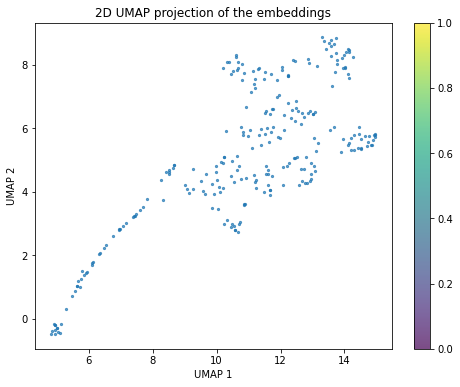

Embedding saved to /home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_1/embedding.npy


In [425]:
import matplotlib.pyplot as plt

# 可视化 embedding 的二维散点图
plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, cmap='Spectral', alpha=0.7)
plt.title('2D UMAP projection of the embeddings')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar()
plt.show()

print(f"Embedding saved to {output_path}")

In [426]:
import numpy as np
import json
import os
from sklearn.metrics.pairwise import cosine_similarity

# 读取数据
data_path = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_1/train_data.npy'
data = np.load(data_path)

# 读取 comment token 长度
comment_index_path = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_1/comment_index.json'
with open(comment_index_path, 'r') as f:
    comment_length = len(json.load(f))

# 拆分 data 成 comment 和 code token
comments = data[:comment_length]
code_tokens = data[comment_length:]

# 计算相似度函数（使用余弦相似度）
def compute_similarity(tokens_a, tokens_b):
    return cosine_similarity(tokens_a, tokens_b)

# intra 相似度计算
intra_comment_sim = compute_similarity(comments, comments)
intra_code_sim = compute_similarity(code_tokens, code_tokens)

# inter 相似度计算
inter_comment_code_sim = compute_similarity(comments, code_tokens)
inter_code_comment_sim = compute_similarity(code_tokens, comments)

# 获取前 k 个最近邻
k = 5  # 假设我们需要前 5 个最近邻
def get_top_k_indices(sim_matrix, k):
    return np.argsort(-sim_matrix, axis=1)[:, :k]  # 获取前 k 个索引

# intra 计算
intra_comment_neighbors = get_top_k_indices(intra_comment_sim, k)
intra_code_neighbors = get_top_k_indices(intra_code_sim, k) + comment_length  # 加 offset

# inter 计算
inter_comment_neighbors = get_top_k_indices(inter_comment_code_sim, k) + comment_length  # comment 对 code 的相似度
inter_code_neighbors = get_top_k_indices(inter_code_comment_sim, k)  # code 对 comment 的相似度

# 拼接 intra 和 inter 结果
intra_neighbors = np.concatenate([intra_comment_neighbors, intra_code_neighbors], axis=0)
inter_neighbors = np.concatenate([inter_comment_neighbors, inter_code_neighbors], axis=0)


In [427]:

# 保存结果到文件
save_dir = '/home/yiming/cophi/training_dynamic/gcb_tokens_temp/Model/Epoch_1'
intra_path = os.path.join(save_dir, "intra_similarity.npy")
inter_path = os.path.join(save_dir, "inter_similarity.npy")

np.save(intra_path, intra_neighbors)
np.save(inter_path, inter_neighbors)

# print(f"Intra neighbors saved to {intra_path}")
# print(f"Inter neighbors saved to {inter_path}")


In [428]:
ori_valid_code_attention_output_path = os.path.join("/home/yiming/cophi/training_dynamic/features/aa_possim", 'train_code_attention_aa.npy')
ori_valid_nl_attention_output_path = os.path.join("/home/yiming/cophi/training_dynamic/features/aa_possim", 'train_nl_attention_aa.npy')
ori_valid_code_attention_feature = np.load(ori_valid_code_attention_output_path)
ori_valid_nl_attention_feature = np.load(ori_valid_nl_attention_output_path)

In [429]:
# 预设10种高对比度颜色
high_contrast_colors = [
    "#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF",
    "#00FFFF", "#800000", "#008000", "#000080", "#808000"
]

In [430]:
indices = [i for i, value in enumerate(idx_list) if value == comment_id]

# 提取match_list中对应索引的值
match_values = [match_list[i] for i in indices]

# 输出结果
print("Indices of 7045 in idx_list:", indices)
print("Corresponding values in match_list:", match_values)
# 初始化结果列表
comment_list = []
code_list = []

# 遍历 match_values，处理每个 comment 和 code 的区间
for match in match_values[0]:  # 假设 match_values 的结构是 [[...]]
    comment_intervals, code_intervals = match

    # 展开 comment 的所有索引
    comment_indices = []
    for start, end in zip(comment_intervals[::2], comment_intervals[1::2]):
        comment_indices.extend(range(start, end + 1))
    comment_list.append(comment_indices)

    # 展开 code 的所有索引
    code_indices = []
    for start, end in zip(code_intervals[::2], code_intervals[1::2]):
        code_indices.extend(range(start, end + 1))
    code_list.append(code_indices)

# 输出结果
print("Comment indices list:", comment_list)
print("Code indices list:", code_list)


Indices of 7045 in idx_list: [82]
Corresponding values in match_list: [[[[0, 1], [123, 123]], [[3, 3], [3, 4]], [[6, 6], [123, 123]], [[10, 10], [9, 10, 13, 13]]]]
Comment indices list: [[0, 1], [3], [6], [10]]
Code indices list: [[123], [3, 4], [123], [9, 10, 13]]


In [431]:
import numpy as np
from collections import deque
from IPython.display import display, HTML

array = ori_valid_nl_attention_feature[comment_id]
array = array[1:]

token_list1 = nl_tokens_data[comment_id][1:]
doc_snippet = train_dataset[comment_id]["docstring"]
normalized_contributions = (array - array.min()) / (array.max() - array.min())

# 将 token 与对应的贡献值配对，并去掉 token 中的 "Ġ" 符号
tokens_with_contributions = deque([(token.replace("Ġ", ""), contrib) for token, contrib in zip(token_list1, normalized_contributions)])

# 为每个 comment_list 的索引组指定颜色
color_map = {}
for i, indices in enumerate(comment_list):
    color = high_contrast_colors[i % len(high_contrast_colors)]  # 循环使用颜色
    for idx in indices:
        color_map[idx] = color

# 生成HTML带字体大小和颜色调整的输出
html_string = "<pre>"
buffer = ""
current_index = 0  # 追踪 code_snippet 中字符的索引位置

# 遍历原始代码片段的每个字符
for char in doc_snippet:
    if char == "\n":
        # 遇到换行符则添加 <br> 标签并清空缓冲区
        html_string += buffer + "<br>"
        buffer = ""
    elif tokens_with_contributions:
        # 获取当前 token 和其贡献值
        token, contrib = tokens_with_contributions[0]
        buffer += char

        # 逐字符匹配：检查 token 是否与 buffer 逐字符匹配
        if buffer == token:
            # 将贡献值映射到字体大小范围 [8, 16]
            font_size = 8 + (16 - 8) * contrib
            color = color_map.get(current_index, "black")  # 如果索引有颜色则应用，否则默认为黑色
            html_string += f'<span style="font-size: {font_size}px; color: {color};">{buffer}</span>'
            buffer = ""  # 清空缓冲区
            tokens_with_contributions.popleft()  # 移除已匹配的 token
            current_index += 1
        elif not token.startswith(buffer):
            # 如果缓冲区字符序列和当前 token 不匹配，将缓冲区第一个字符添加到 HTML 并继续逐字符匹配
            color = color_map.get(current_index, "black")
            html_string += f'<span style="color: {color};">{buffer[0]}</span>'
            buffer = buffer[1:]      
        
    else:
        # 如果没有更多 token 需要匹配，默认输出字符
        color = color_map.get(current_index, "black")
        html_string += f'<span style="color: {color};">{char}</span>'

html_string += buffer  # 添加剩余的缓冲区内容
html_string += "</pre>"

# 在Jupyter Notebook中显示带有字体大小和颜色调整的文本
display(HTML(html_string))

In [448]:
# 假设我们有原始代码片段和分词后的 tokens（包含缩进和换行）
code_snippet = remove_docstrings(train_dataset[code_ind]["code"])
token_list2 = code_tokens_data[code_ind][1:]

# 假设注意力特征数组 (示例)
code_attention_feature = ori_valid_code_attention_feature[code_ind][1:]  # 模拟的注意力分数

# 归一化注意力特征
code_normalized_contributions = (code_attention_feature - code_attention_feature.min()) / (code_attention_feature.max() - code_attention_feature.min())

# 将 token 与对应的贡献值配对，并去掉 token 中的 "Ġ" 符号
tokens_with_contributions = deque([(token.replace("Ġ", ""), contrib) for token, contrib in zip(token_list2, code_normalized_contributions)])

# 为每个 code_list 的索引组指定颜色
color_map = {}
for i, indices in enumerate(code_list):
    color = high_contrast_colors[i % len(high_contrast_colors)]  # 循环使用颜色
    for idx in indices:
        color_map[idx] = color

# 生成HTML带字体大小和颜色调整的输出
html_string = "<pre>"
buffer = ""
current_index = 0  # 追踪 code_snippet 中字符的索引位置

# 遍历原始代码片段的每个字符
for char in code_snippet:
    if char == "\n":
        # 遇到换行符则添加 <br> 标签并清空缓冲区
        html_string += buffer + "<br>"
        buffer = ""
    elif tokens_with_contributions:
        # 获取当前 token 和其贡献值
        token, contrib = tokens_with_contributions[0]
        buffer += char

        # 逐字符匹配：检查 token 是否与 buffer 逐字符匹配
        if buffer == token:
            # 将贡献值映射到字体大小范围 [8, 16]
            font_size = 8 + (16 - 8) * contrib
            color = color_map.get(current_index, "black")  # 如果索引有颜色则应用，否则默认为黑色
            html_string += f'<span style="font-size: {font_size}px; color: {color};">{buffer}</span>'
            buffer = ""  # 清空缓冲区
            tokens_with_contributions.popleft()  # 移除已匹配的 token
            current_index += 1
        elif not token.startswith(buffer):
            # 如果缓冲区字符序列和当前 token 不匹配，将缓冲区第一个字符添加到 HTML 并继续逐字符匹配
            color = color_map.get(current_index, "black")
            html_string += f'<span style="color: {color};">{buffer[0]}</span>'
            buffer = buffer[1:]      
        
    else:
        # 如果没有更多 token 需要匹配，默认输出字符
        color = color_map.get(current_index, "black")
        html_string += f'<span style="color: {color};">{char}</span>'

html_string += buffer  # 添加剩余的缓冲区内容
html_string += "</pre>"

# 在Jupyter Notebook中显示带有字体大小和颜色调整的文本
display(HTML(html_string))

In [433]:
comment_sorted_indices = np.argsort(-intra_comment_sim)
# 遍历每一行的排序索引，并输出排序后的 comment_data
for row_idx, sorted_indices in enumerate(comment_sorted_indices):
    sorted_comments = [comment_data[i] for i in sorted_indices]
    sorted_similarities = [intra_comment_sim[row_idx][i] for i in sorted_indices]
    print(f"Row {comment_data[row_idx]} most similar comments:")
    for idx, (comment, similarity) in enumerate(zip(sorted_comments, sorted_similarities)):
        print(f"  Rank {idx + 1}: {comment} (Similarity: {similarity:.4f})")
    print()  # 空行用于分隔每一行的输出

Row <s> most similar comments:
  Rank 1: <s> (Similarity: 1.0000)
  Rank 2: ract (Similarity: -0.0211)
  Rank 3: Ext (Similarity: -0.0226)
  Rank 4: Ġgeometry (Similarity: -0.0264)
  Rank 5: Ġatom (Similarity: -0.0270)
  Rank 6: Ġsubset (Similarity: -0.0271)
  Rank 7: Ġdesired (Similarity: -0.0325)
  Rank 8: Ġmatching (Similarity: -0.0387)
  Rank 9: Ġa (Similarity: -0.0413)
  Rank 10: Ġa (Similarity: -0.0448)
  Rank 11: Ġ. (Similarity: -0.0549)
  Rank 12: Ġof (Similarity: -0.0587)
  Rank 13: Ġa (Similarity: -0.0706)

Row Ext most similar comments:
  Rank 1: Ext (Similarity: 1.0000)
  Rank 2: ract (Similarity: 0.9979)
  Rank 3: Ġgeometry (Similarity: 0.9894)
  Rank 4: Ġsubset (Similarity: 0.9885)
  Rank 5: Ġatom (Similarity: 0.9860)
  Rank 6: Ġmatching (Similarity: 0.9550)
  Rank 7: Ġdesired (Similarity: 0.9456)
  Rank 8: Ġa (Similarity: 0.9394)
  Rank 9: Ġa (Similarity: 0.9357)
  Rank 10: Ġ. (Similarity: 0.8662)
  Rank 11: Ġof (Similarity: 0.7224)
  Rank 12: Ġa (Similarity: 0.6769)
  R

In [434]:
code_sorted_indices = np.argsort(-intra_code_sim)
# 遍历每一行的排序索引，并输出排序后的 code_data
for row_idx, sorted_indices in enumerate(code_sorted_indices):
    sorted_code = [code_data[i] for i in sorted_indices]
    sorted_similarities = [intra_code_sim[row_idx][i] for i in sorted_indices]
    print(f"Row {code_data[row_idx]} most similar codes:")
    for idx, (comment, similarity) in enumerate(zip(sorted_code, sorted_similarities)):
        print(f"  Rank {idx + 1}: {comment, sorted_indices[idx]} (Similarity: {similarity:.4f})")
    print()  # 空行用于分隔每一行的输出

Row <s> most similar codes:
  Rank 1: ('<s>', 0) (Similarity: 1.0000)
  Rank 2: ('Ġmake', 70) (Similarity: 0.0003)
  Rank 3: ('Ġmake', 42) (Similarity: -0.0009)
  Rank 4: ('Ġt', 85) (Similarity: -0.0014)
  Rank 5: ('Ġ=', 41) (Similarity: -0.0019)
  Rank 6: ('Ġt', 55) (Similarity: -0.0030)
  Rank 7: ('Ġraise', 114) (Similarity: -0.0031)
  Rank 8: ('_', 71) (Similarity: -0.0035)
  Rank 9: ('Ġ:', 113) (Similarity: -0.0045)
  Rank 10: ('Ġ:', 34) (Similarity: -0.0046)
  Rank 11: ('Ġnot', 192) (Similarity: -0.0047)
  Rank 12: ('Ġ=', 217) (Similarity: -0.0048)
  Rank 13: ('Ġconc', 204) (Similarity: -0.0048)
  Rank 14: ('Ġ[', 195) (Similarity: -0.0050)
  Rank 15: ('Ġ==', 194) (Similarity: -0.0053)
  Rank 16: ('Ġ:', 239) (Similarity: -0.0053)
  Rank 17: ('Ġat', 66) (Similarity: -0.0054)
  Rank 18: ('ĠNone', 83) (Similarity: -0.0055)
  Rank 19: ('Ġ==', 103) (Similarity: -0.0056)
  Rank 20: ('Ġ)', 33) (Similarity: -0.0057)
  Rank 21: ('_', 73) (Similarity: -0.0058)
  Rank 22: ('Ġnp', 87) (Similar

  Rank 222: ('Ġ:', 239) (Similarity: 0.6896)
  Rank 223: ('Ġ,', 91) (Similarity: 0.6896)
  Rank 224: ('Ġnot', 192) (Similarity: 0.6890)
  Rank 225: ('Ġ(', 184) (Similarity: 0.6890)
  Rank 226: ('Ġlen', 99) (Similarity: 0.6885)
  Rank 227: ('Ġ.', 173) (Similarity: 0.6884)
  Rank 228: ('Ġ)', 112) (Similarity: 0.6877)
  Rank 229: ('Ġ(', 107) (Similarity: 0.6875)
  Rank 230: ('Ġc', 158) (Similarity: 0.6873)
  Rank 231: ('_', 71) (Similarity: 0.6873)
  Rank 232: ('sub', 242) (Similarity: 0.6871)
  Rank 233: ('Ġ=', 86) (Similarity: 0.6869)
  Rank 234: ('Ġn', 80) (Similarity: 0.6864)
  Rank 235: ('Ġ,', 177) (Similarity: 0.6859)
  Rank 236: ('ts', 110) (Similarity: 0.6852)
  Rank 237: ('Ġ,', 159) (Similarity: 0.6848)
  Rank 238: ('."', 133) (Similarity: 0.6847)
  Rank 239: ('Ġ.', 182) (Similarity: 0.6835)
  Rank 240: ('_', 73) (Similarity: 0.6834)
  Rank 241: ('Ġ)', 134) (Similarity: 0.6831)
  Rank 242: ('len', 129) (Similarity: 0.6824)
  Rank 243: ('nd', 72) (Similarity: 0.6820)
  Rank 244: (

In [435]:
print(np.max(inter_comment_code_sim))  # 输出最大值
print(np.min(inter_comment_code_sim))  # 输出最小值
print(np.max(intra_comment_sim))
print(np.min(intra_comment_sim))
print(np.max(intra_code_sim))
print(np.min(intra_code_sim))

0.92245865
-0.15942049
1.0000002
-0.07057658
1.0000005
-0.036836274


In [436]:
comment_sorted_indices = np.argsort(-inter_comment_code_sim)
# 遍历每一行的排序索引，并输出排序后的 comment_data
for row_idx, sorted_indices in enumerate(comment_sorted_indices):
    sorted_comments = [code_data[i] for i in sorted_indices]
    sorted_similarities = [inter_comment_code_sim[row_idx][i] for i in sorted_indices]
    print(f"Row {comment_data[row_idx]} most similar codes:")
    for idx, (comment, similarity) in enumerate(zip(sorted_comments, sorted_similarities)):
        print(f"  Rank {idx + 1}: {comment, sorted_indices[idx]} (Similarity: {similarity:.4f})")
    print()  # 空行用于分隔每一行的输出

Row <s> most similar codes:
  Rank 1: ('<s>', 0) (Similarity: 0.5782)
  Rank 2: ('Ġmake', 70) (Similarity: 0.0059)
  Rank 3: ('Ġmake', 42) (Similarity: 0.0033)
  Rank 4: ('Ġnp', 202) (Similarity: 0.0030)
  Rank 5: ('_', 43) (Similarity: 0.0027)
  Rank 6: ('ate', 206) (Similarity: 0.0026)
  Rank 7: ('_', 71) (Similarity: 0.0025)
  Rank 8: ('Ġ[', 195) (Similarity: 0.0025)
  Rank 9: ('Ġat', 66) (Similarity: 0.0022)
  Rank 10: ('Ġc', 155) (Similarity: 0.0016)
  Rank 11: ('Ġnp', 57) (Similarity: 0.0014)
  Rank 12: ('sub', 216) (Similarity: 0.0013)
  Rank 13: ('Ġg', 198) (Similarity: 0.0013)
  Rank 14: ('ĠNone', 83) (Similarity: 0.0012)
  Rank 15: ('Ġnp', 87) (Similarity: 0.0011)
  Rank 16: ('Ġif', 191) (Similarity: 0.0009)
  Rank 17: ('Ġ[', 244) (Similarity: 0.0007)
  Rank 18: ('Ġat', 76) (Similarity: 0.0007)
  Rank 19: ('Ġco', 165) (Similarity: 0.0006)
  Rank 20: ('Ġ.', 203) (Similarity: 0.0006)
  Rank 21: ('Ġ(', 75) (Similarity: 0.0005)
  Rank 22: ('Ġ,', 79) (Similarity: 0.0004)
  Rank 23

  Rank 12: ('_', 3) (Similarity: 0.6728)
  Rank 13: ('Ġg', 2) (Similarity: 0.6167)
  Rank 14: ('g', 124) (Similarity: 0.5364)
  Rank 15: ('Ġg', 7) (Similarity: 0.5277)
  Rank 16: ('Ġ[', 121) (Similarity: 0.4799)
  Rank 17: ('sub', 4) (Similarity: 0.4284)
  Rank 18: ('Ġ=', 201) (Similarity: 0.3685)
  Rank 19: ('Ġg', 101) (Similarity: 0.3636)
  Rank 20: ('Ġ(', 140) (Similarity: 0.3579)
  Rank 21: ('Ġat', 9) (Similarity: 0.2980)
  Rank 22: ('Ġat', 13) (Similarity: 0.2892)
  Rank 23: ('Ġ=', 17) (Similarity: 0.2657)
  Rank 24: ('Ġg', 48) (Similarity: 0.2314)
  Rank 25: ('def', 1) (Similarity: 0.2308)
  Rank 26: ('Ġ_', 18) (Similarity: 0.2300)
  Rank 27: ('Ġ=', 69) (Similarity: 0.2262)
  Rank 28: ('(', 123) (Similarity: 0.1770)
  Rank 29: ('Ġreturn', 246) (Similarity: 0.1752)
  Rank 30: ('Ġsplit', 139) (Similarity: 0.1589)
  Rank 31: ('Ġg', 218) (Similarity: 0.1311)
  Rank 32: ('Ġco', 135) (Similarity: 0.1206)
  Rank 33: ('Ġ.', 20) (Similarity: 0.1141)
  Rank 34: ('Ġg', 141) (Similarity: 0.1

In [437]:
# j = comment_id

In [438]:
# token_list1 = train_dataset[j]["docstring_tokens"][:]
# print(train_dataset[j]["docstring"])

In [439]:
# for i in range(n):
#     print(i, comment_data[i])

In [440]:
# comment_tokenized_list = [[0, 0], [1, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10], [11, 11]]

In [441]:
# # 创建一个新的数组用于存储修改后的特征
# new_ori_nl_attention_feature = np.zeros(ori_valid_nl_attention_feature[code_ind].shape[0])

# # 遍历每个区间
# for num, (start, end) in enumerate(comment_tokenized_list):
#     if end > start:
#         # 计算该区间内的行的平均值
#         mean_values = np.mean(ori_valid_nl_attention_feature[code_ind][start+1:end+1], axis=0)
#         # 将平均值存储在新的数组的相应行
#         new_ori_nl_attention_feature[num] = mean_values
#     else:
#         new_ori_nl_attention_feature[num] = ori_valid_nl_attention_feature[code_ind][end]

In [442]:
# # 获取第 i 个数组
# array = new_ori_nl_attention_feature
# array = array[1:]
# from IPython.display import display, HTML
# normalized_contributions = (array - array.min()) / (array.max() - array.min())
# html_string = "<p>"

# indices = list(range(1, len(ori_valid_nl_attention_feature[j])))

# # 为每个token设置颜色
# for idx, token in zip(indices, token_list1):
#     # print(idx, token)
#     color_intensity = int(255 * (1 - normalized_contributions[idx-1]))  # 将贡献值转为颜色强度
#     color = f"rgb({color_intensity}, {color_intensity}, 255)"  # 颜色从浅蓝到深蓝
#     html_string += f'<span style="background-color: {color};">{token} </span>'

# html_string += "</p>"

# # 在Jupyter Notebook中显示带有颜色标记的文本
# display(HTML(html_string))

In [443]:
# # 使用函数
# filtered_data = remove_padding_intervals(tokenized_id_data[code_ind])
# print(filtered_data)

In [444]:
# # 创建一个新的数组用于存储修改后的特征
# new_ori_code_attention_feature = np.zeros(ori_valid_code_attention_feature[code_ind].shape[0])

# # 遍历每个区间
# for num, (start, end) in enumerate(filtered_data):
#     if end > start:
#         # 计算该区间内的行的平均值
#         mean_values = np.mean(ori_valid_code_attention_feature[code_ind][start+1:end+1], axis=0)
#         # 将平均值存储在新的数组的相应行
#         new_ori_code_attention_feature[num] = mean_values
#     else:
#         new_ori_code_attention_feature[num] = ori_valid_code_attention_feature[code_ind][end]

In [445]:
# token_list2 = train_dataset[code_ind]["code_tokens"][:]
# k = code_ind
# # 获取第 i 个数组
# code_array = new_ori_code_attention_feature
# code_array = np.nan_to_num(code_array, nan=0.0)
# code_array = code_array[1:]
# from collections import deque
# code_normalized_contributions = (code_array - code_array.min()) / (code_array.max() - code_array.min())
# html_string = "<pre>"

# indices = list(range(1, len(new_ori_code_attention_feature)))
# code_snippet = remove_docstrings(train_dataset[code_ind]["code"])

# tokens_with_contributions = deque(zip(token_list2, code_normalized_contributions))

# buffer = ""

# # 遍历原始代码片段的每个字符
# for char in code_snippet:
#     if tokens_with_contributions:
#         token, contrib = tokens_with_contributions[0]
#         buffer += char

#         # 检查缓冲区是否匹配当前 token
#         if buffer == token:
#             color_intensity = int(255 * (1 - contrib))  # 将贡献值转为颜色强度
#             color = f"rgb({color_intensity}, {color_intensity}, 255)"  # 颜色从浅蓝到深蓝
#             html_string += f'<span style="background-color: {color};">{buffer}</span>'
#             buffer = ""  # 清空缓冲区
#             tokens_with_contributions.popleft()  # 移除已匹配的 token
#         elif not token.startswith(buffer):
#             # 如果当前缓冲区不匹配 token，则将缓冲区内容添加到 HTML 并清空缓冲区
#             html_string += buffer[0]
#             buffer = buffer[1:]
#     else:
#         html_string += char

# html_string += buffer  # 添加剩余的缓冲区内容

# html_string += "</pre>"

# # 在Jupyter Notebook中显示带有颜色标记的文本
# display(HTML(html_string))

In [446]:
# inter_comment_code_sim.shape

In [447]:
print(train_dataset[code_ind]['code'])

def g_subset(g, atwts, atwt,
            digits=_DEF.SYMM_ATWT_ROUND_DIGITS):
    """ Extract a subset of a geometry matching a desired atom.

    .. todo:: Complete g_subset docstring

    """

    # Imports
    import numpy as np

    # Ensure g and atwts are n-D vectors
    g = make_nd_vec(g, nd=None, t=np.float64, norm=False)
    atwts = make_nd_vec(atwts, nd=None, t=np.float64, norm=False)

    # Ensure dims match (should already be checked at object creation...)
    if not (len(g) == 3*len(atwts)):
        raise ValueError("Dim mismatch [len(g) != 3*len(ats)].")
    ## end if

    # Pull into coordinate groups
    co = np.split(g, g.shape[0] // 3)

    # Filter by the indicated atomic weight
    cf = [c for (c,a) in zip(co, atwts) if \
                    np.round(a, digits) == np.round(atwt, digits)]

    # Expand back to single vector, if possible
    if not cf == []:
        g_sub = np.concatenate(cf, axis=0)
        g_sub = g_sub.reshape((g_sub.shape[0],1))
    else:
        